Network example

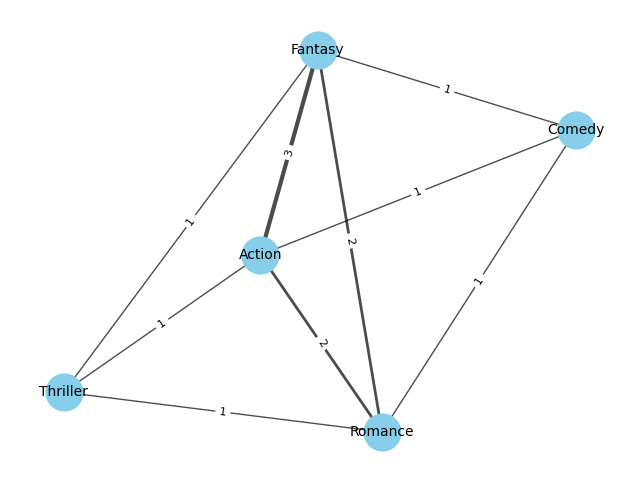

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Exxample network of books and genres
books = {
    "Book1": {"Fantasy", "Romance", "Action", "Thriller"},
    "Book2": {"Fantasy", "Action"},
    "Book3": {"Romance", "Comedy", "Fantasy", "Action"},
}

# Create a graph
G = nx.Graph()

# Add edges based on genre co-occurrence
for book, genres in books.items():
    for genre1, genre2 in combinations(genres, 2):
        if G.has_edge(genre1, genre2):
            G[genre1][genre2]['weight'] += 1
        else:
            G.add_edge(genre1, genre2, weight=1)

# Add edge weights for labeling
edge_weights = nx.get_edge_attributes(G, 'weight')


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42) 


weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=[weight for weight in weights], alpha=0.7)


nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")


nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")


nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_size=8)


plt.axis("off")
plt.show()


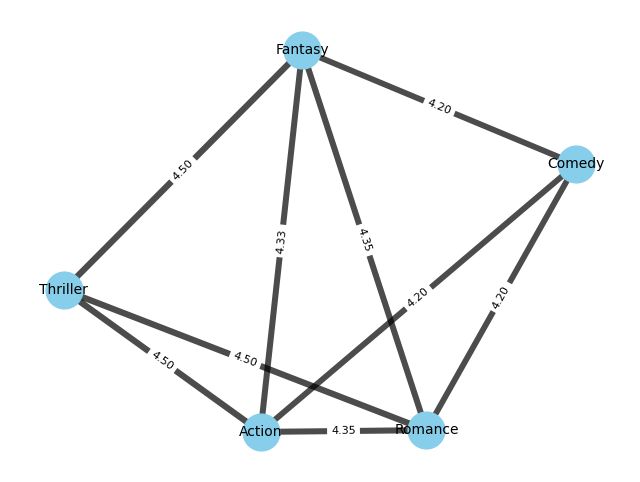

In [3]:
import pandas as pd

# Read the provided image to extract data (manually extracted based on visual inspection)
# Data is manually interpreted from the image as follows:
# Book  | Rating | Genres
data = [
    {"Book": "Book1", "Rating": 4.5, "Genres": ["Fantasy", "Romance", "Action", "Thriller"]},
    {"Book": "Book2", "Rating": 4.3, "Genres": ["Fantasy", "Action"]},
    {"Book": "Book3", "Rating": 4.2, "Genres": ["Romance", "Comedy", "Fantasy", "Action"]},
]

# Convert to a DataFrame for easier handling
books_df = pd.DataFrame(data)
books_df
# Update the graph logic to calculate the average rating for each edge

# Create a graph
G = nx.Graph()

# Add edges based on genre co-occurrence with average rating as weights
for _, row in books_df.iterrows():
    genres = row['Genres']
    rating = row['Rating']
    for genre1, genre2 in combinations(genres, 2):
        if G.has_edge(genre1, genre2):
            # Update the cumulative rating and increment count
            G[genre1][genre2]['sum_ratings'] += rating
            G[genre1][genre2]['count'] += 1
        else:
            # Initialize edge attributes
            G.add_edge(genre1, genre2, sum_ratings=rating, count=1)

# Compute average rating for each edge
for u, v in G.edges():
    G[u][v]['avg_rating'] = G[u][v]['sum_ratings'] / G[u][v]['count']

# Add edge labels for average rating
edge_avg_ratings = nx.get_edge_attributes(G, 'avg_rating')

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)

# Draw edges with weights
weights = [G[u][v]['avg_rating'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=[weight for weight in weights], alpha=0.7)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Draw edge labels for average ratings
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_avg_ratings.items()}, font_size=8)

plt.axis("off")
plt.show()


In [2]:
import pandas as pd
from itertools import combinations
from collections import defaultdict


file_path = 'Goodreads_books_with_genres.csv'
data = pd.read_csv(file_path)

# Extract the genres column
genres = data['genres']

#Preprocess genres to create sets for each book

genre_lists = [set(str(g).split(';')) if isinstance(g, str) else set() for g in genres]

#Count genre co-occurrences (edges)
genre_edges = defaultdict(int)

# For each book's genres, find all pairs and count them
for genre_list in genre_lists:
    for genre1, genre2 in combinations(genre_list, 2):  # Generate pairs of genres
        genre_edges[tuple(sorted([genre1, genre2]))] += 1

#Count unique edges
total_genre_edges = len(genre_edges)

#Calculate the number of unique genres (nodes)
unique_genres = set().union(*genre_lists)  # Combine all genres into a unique set
num_genres = len(unique_genres)  # Count of unique genres

#Calculate the percentage of possible links
possible_genre_links = num_genres * (num_genres - 1) / 2  # Formula for nC2
percentage_genre_links = (total_genre_edges / possible_genre_links) * 100

# Output results
print(f"Number of nodes (genres): {num_genres}")
print(f"Number of edges (genre pairs): {total_genre_edges}")
print(f"Percentage of possible links: {percentage_genre_links:.2f}%")


Number of nodes (genres): 890
Number of edges (genre pairs): 27051
Percentage of possible links: 6.84%


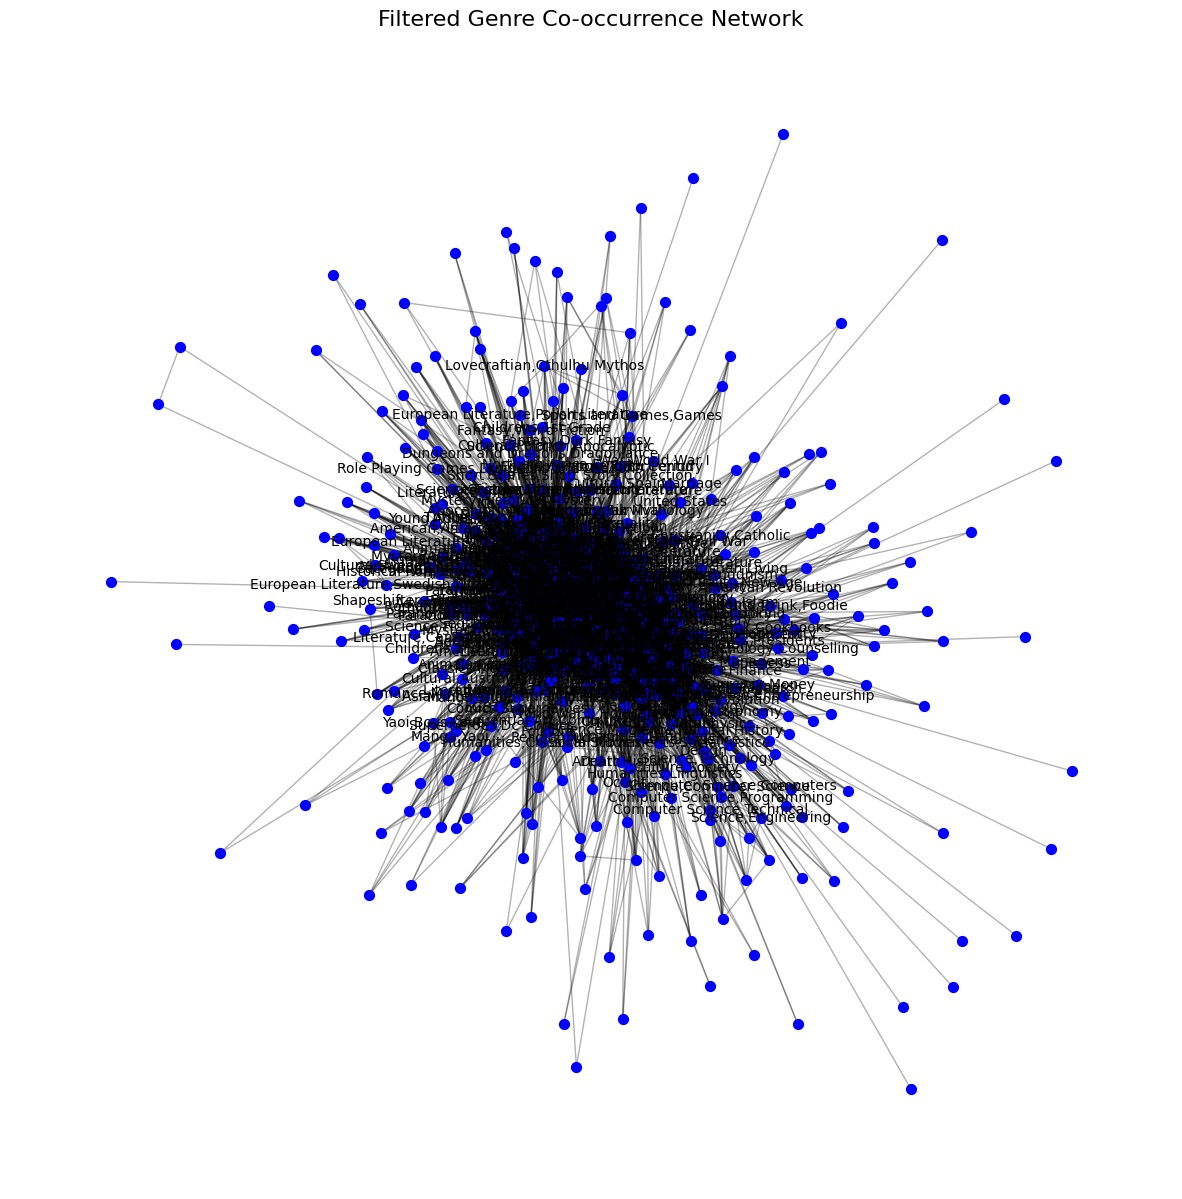

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Reload dataset (if needed, provide file again)
file_path = 'Goodreads_books_with_genres.csv'
data = pd.read_csv(file_path)

# Extract and preprocess genres
genres = data['genres']
genre_lists = [set(str(g).split(';')) if isinstance(g, str) else set() for g in genres]

# Build graph data
genre_edges = {}
for genre_list in genre_lists:
    for genre1, genre2 in combinations(genre_list, 2):
        edge = tuple(sorted((genre1, genre2)))
        genre_edges[edge] = genre_edges.get(edge, 0) + 1

# Create graph
G = nx.Graph()
for edge, weight in genre_edges.items():
    G.add_edge(edge[0], edge[1], weight=weight)

# Filter for better readability: keep only edges with weight > threshold (e.g., 5)
threshold = 5
filtered_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] > threshold]
H = G.edge_subgraph(filtered_edges).copy()

# Plot graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(H, k=0.5, seed=42)  # Adjust `k` for better spacing

# Draw nodes and edges
nx.draw_networkx_nodes(H, pos, node_size=50, node_color="blue")
nx.draw_networkx_edges(H, pos, alpha=0.3)

# Draw labels for the most connected nodes
high_degree_nodes = [node for node, degree in H.degree() if degree > 10]
nx.draw_networkx_labels(
    H, pos, labels={node: node for node in high_degree_nodes}, font_size=10
)

plt.title("Filtered Genre Co-occurrence Network", fontsize=16)
plt.axis("off")
plt.show()


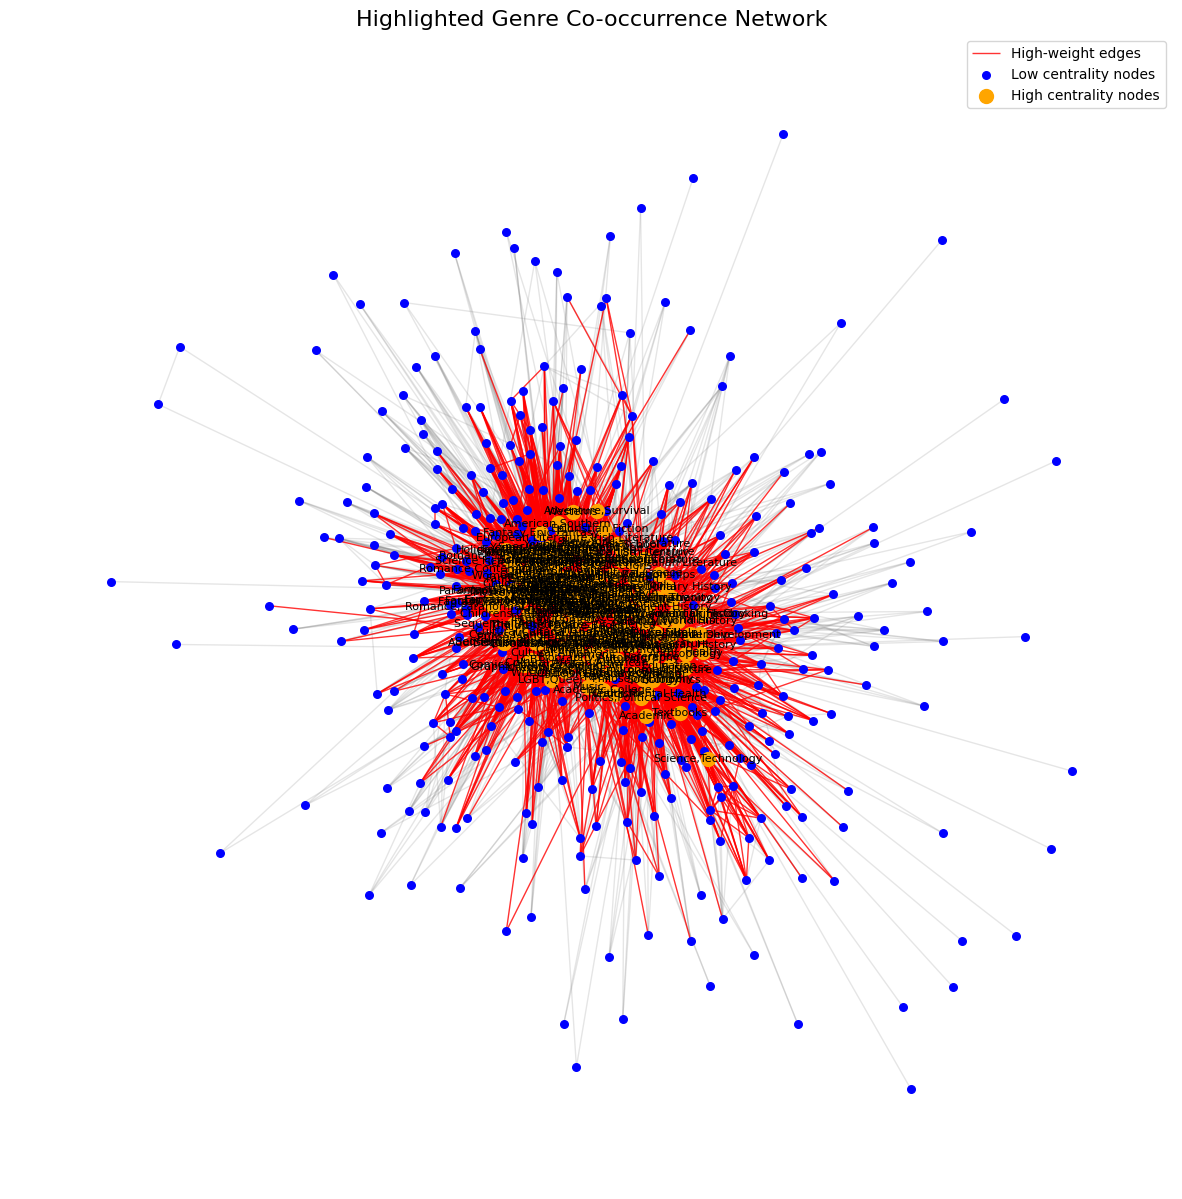

In [6]:
# Highlight important nodes and edges by centrality and weight

# Calculate centrality metrics for highlighting
degree_centrality = nx.degree_centrality(H)
high_centrality_nodes = {node for node, centrality in degree_centrality.items() if centrality > 0.05}

# Classify edges by weight for coloring
edge_weights = nx.get_edge_attributes(H, "weight")
high_weight_edges = [(u, v) for u, v, weight in H.edges(data=True) if weight["weight"] > 10]

# Plot graph with highlighted nodes and edges
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(H, k=0.5, seed=42)  # Adjust for spacing

# Draw less important edges
low_weight_edges = [(u, v) for u, v in H.edges() if (u, v) not in high_weight_edges]
nx.draw_networkx_edges(H, pos, edgelist=low_weight_edges, alpha=0.2, edge_color="gray")

# Draw highlighted edges
nx.draw_networkx_edges(
    H, pos, edgelist=high_weight_edges, alpha=0.8, edge_color="red", label="High-weight edges"
)

# Draw less important nodes
low_centrality_nodes = [node for node in H.nodes() if node not in high_centrality_nodes]
nx.draw_networkx_nodes(H, pos, nodelist=low_centrality_nodes, node_size=30, node_color="blue", label="Low centrality nodes")

# Draw highlighted nodes
nx.draw_networkx_nodes(
    H, pos, nodelist=high_centrality_nodes, node_size=100, node_color="orange", label="High centrality nodes"
)

# Add labels for the most central nodes
nx.draw_networkx_labels(
    H, pos, labels={node: node for node in high_centrality_nodes}, font_size=8, font_color="black"
)

# Add legend
plt.legend(scatterpoints=1, loc="upper right", fontsize=10)
plt.title("Highlighted Genre Co-occurrence Network", fontsize=16)
plt.axis("off")
plt.show()


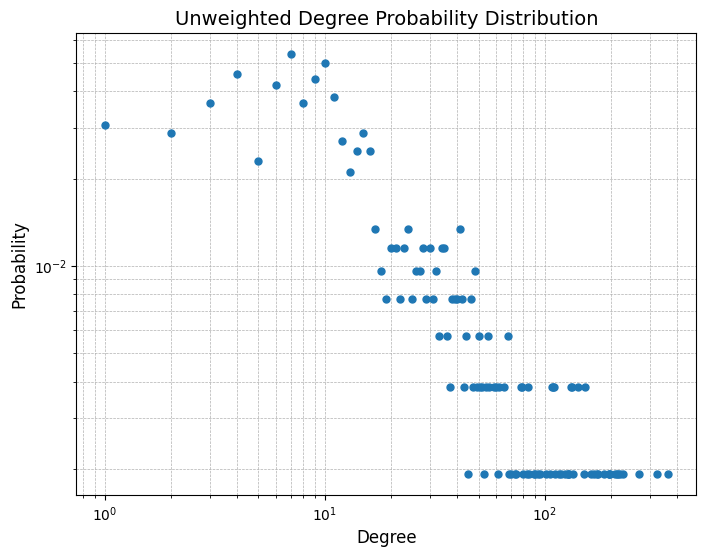

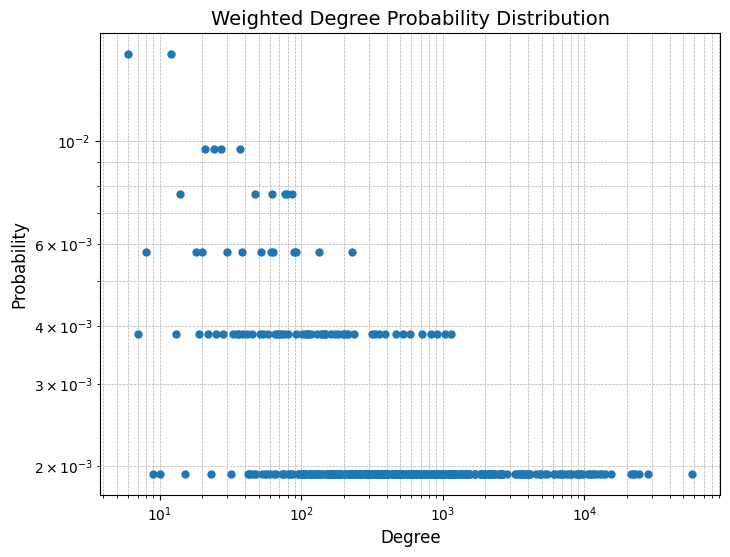

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Compute unweighted and weighted degrees
unweighted_degrees = dict(H.degree())  # Unweighted degree
weighted_degrees = dict(H.degree(weight="weight"))  # Weighted degree

# Function to compute degree probability distribution
def plot_degree_distribution(degrees, title):
    degree_values = np.array(list(degrees.values()))
    unique_degrees, counts = np.unique(degree_values, return_counts=True)
    probabilities = counts / sum(counts)

    # Plot on log-log scale
    plt.figure(figsize=(8, 6))
    plt.loglog(unique_degrees, probabilities, 'o', markersize=5)
    plt.xlabel("Degree", fontsize=12)
    plt.ylabel("Probability", fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

# Plot for unweighted degrees
plot_degree_distribution(unweighted_degrees, "Unweighted Degree Probability Distribution")

# Plot for weighted degrees
plot_degree_distribution(weighted_degrees, "Weighted Degree Probability Distribution")


